In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import ipyvolume as ipv
import numpy as np
import pymesh # https://github.com/PyMesh/PyMesh
import pylab
import scipy
from mpl_toolkits.mplot3d import Axes3D
import scipy.ndimage as nd
import numpy as np


In [2]:
mesh = pymesh.load_mesh("face1.obj");
#np.savetxt("face1.csv", mesh.vertices, delimiter=",")

In [3]:
print(mesh.num_vertices, mesh.num_faces, mesh.num_voxels)

5968 11752 0


In [4]:
#print(mesh.dim, mesh.vertex_per_face, mesh.vertex_per_voxel)

In [5]:
mesh.vertices.shape

(5968, 3)

In [6]:
#mesh.faces.shape

In [7]:
#mesh.voxels

In [8]:
#mesh.get_attribute_names()

In [9]:
vertices = mesh.vertices

In [10]:
vertices.shape

(5968, 3)

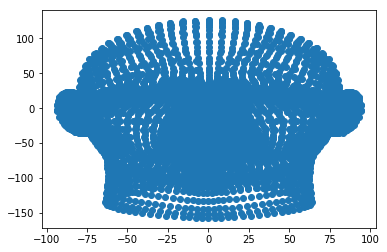

In [11]:
plt.scatter(vertices[:, 0], vertices[:, 1])

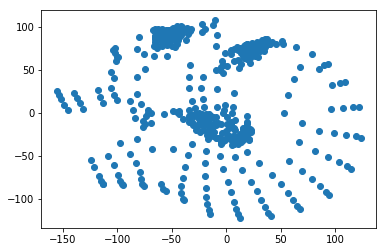

In [12]:
plt.scatter(vertices[1000:1500, 1],vertices[1000:1500, 2])

In [13]:
vertices.shape
np.savetxt("face.csv", vertices, delimiter=",")

In [14]:
ipv.quickscatter(vertices[:, 0], vertices[:, 1], vertices[:, 2], size=1, marker="sphere")
ipv.show()

In [15]:

def surface_curvature(X,Y,Z):

    (lr,lb)=X.shape

    print (lr)
    print (lb)
    #First Derivatives
    Xv,Xu=np.gradient(X)
    Yv,Yu=np.gradient(Y)
    Zv,Zu=np.gradient(Z)

    #Second Derivatives
    Xuv,Xuu=np.gradient(Xu)
    Yuv,Yuu=np.gradient(Yu)
    Zuv,Zuu=np.gradient(Zu)   

    Xvv,Xuv=np.gradient(Xv)
    Yvv,Yuv=np.gradient(Yv)
    Zvv,Zuv=np.gradient(Zv) 

    #2D to 1D conversion 
    #Reshape to 1D vectors
    Xu=np.reshape(Xu,lr*lb)
    Yu=np.reshape(Yu,lr*lb)
    Zu=np.reshape(Zu,lr*lb)
    Xv=np.reshape(Xv,lr*lb)
    Yv=np.reshape(Yv,lr*lb)
    Zv=np.reshape(Zv,lr*lb)
    Xuu=np.reshape(Xuu,lr*lb)
    Yuu=np.reshape(Yuu,lr*lb)
    Zuu=np.reshape(Zuu,lr*lb)
    Xuv=np.reshape(Xuv,lr*lb)
    Yuv=np.reshape(Yuv,lr*lb)
    Zuv=np.reshape(Zuv,lr*lb)
    Xvv=np.reshape(Xvv,lr*lb)
    Yvv=np.reshape(Yvv,lr*lb)
    Zvv=np.reshape(Zvv,lr*lb)

    Xu=np.c_[Xu, Yu, Zu]
    Xv=np.c_[Xv, Yv, Zv]
    Xuu=np.c_[Xuu, Yuu, Zuu]
    Xuv=np.c_[Xuv, Yuv, Zuv]
    Xvv=np.c_[Xvv, Yvv, Zvv]

    #% First fundamental Coeffecients of the surface (E,F,G)
    E=np.einsum('ij,ij->i', Xu, Xu) 
    F=np.einsum('ij,ij->i', Xu, Xv) 
    G=np.einsum('ij,ij->i', Xv, Xv) 

    m=np.cross(Xu,Xv,axisa=1, axisb=1) 
    p=np.sqrt(np.einsum('ij,ij->i', m, m)) 
    n=m/np.c_[p,p,p]
    # n is the normal
    #% Second fundamental Coeffecients of the surface (L,M,N), (e,f,g)
    L= np.einsum('ij,ij->i', Xuu, n) #e
    M= np.einsum('ij,ij->i', Xuv, n) #f
    N= np.einsum('ij,ij->i', Xvv, n) #g

    # Alternative formula for gaussian curvature in wiki 
    # K = det(second fundamental) / det(first fundamental)
    #% Gaussian Curvature
    K=(L*N-M**2)/(E*G-L**2)
    K=np.reshape(K,lr*lb)
    #wiki trace of (second fundamental)(first fundamental inverse)
    #% Mean Curvature
    H = (E*N + G*L - 2*F*M)/((E*G - F**2))
    print (H.shape)
    H = np.reshape(H,lr*lb)

    #% Principle Curvatures
    Pmax = H + np.sqrt(H**2 - K)
    Pmin = H - np.sqrt(H**2 - K)
    #[Pmax, Pmin]
    return [Pmax, Pmin, G, H]


def fun(x,y):
    return x**2+y**2


In [16]:
x = scipy.linspace(-1,1,20)
y = scipy.linspace(-1,1,20)
[x,y]=scipy.meshgrid(x,y)
z = (x**3 +y**2 +x*y)

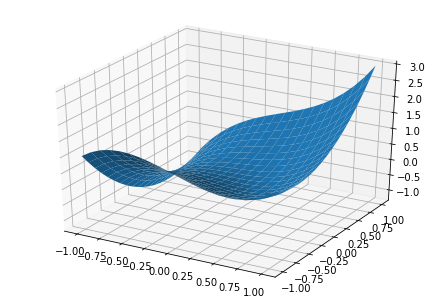

In [23]:
fig = pylab.figure()
ax = Axes3D(fig)
ax.plot_surface(x,y,z)
pylab.show()

In [24]:
ipv.clear()
ipv.plot_surface(x, y, z)
ipv.show()

In [19]:


k1, k2, G, H = surface_curvature(x,y,z)
print ("maximum curvatures")
print (k1)
print ("minimum curvatures")
print (k2)
print ("Gaussian curvatures")
print (G)
print ("Mean curvatures")
print (H)


20
20
(400,)
maximum curvatures
[0.0152669  0.01374299 0.021804   0.03675129 0.04567601 0.04197836
 0.03627197 0.03382012 0.03569224 0.04563004 0.10245106 0.46457949
 1.07318594 1.91577104 2.91145078 4.77806112 5.7992523  5.55360194
 3.2979491  2.29445075 0.03049114 0.02256911 0.03329622 0.05677964
 0.07605278 0.07408311 0.06497997 0.06071879 0.06475017 0.0873682
 0.23414412 0.71518871 1.39853013 2.30792736 6.78976219 5.44737837
 6.27223852 5.72115084 3.36948706 2.48135588 0.09485539 0.04344325
 0.05633756 0.09745658 0.1412507  0.14549287 0.12885857 0.12163119
 0.13547763 0.20766583 0.51992291 1.11537675 1.91234086 2.73248673
 5.1547733  6.58551405 7.0490592  5.95771564 3.36148298 2.64961906
 0.19950558 0.06588764 0.07532622 0.13400186 0.21510963 0.23685086
 0.2072001  0.19177514 0.21474496 0.33655374 0.74635235 1.44665409
 2.35706179 5.43894103 6.05175977 7.43503564 7.20532303 5.5761703
 2.90590451 2.39889721 0.36160792 0.1139808  0.10744855 0.19698151
 0.36542915 0.44359667 0.3659940

/home/ags/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:72: RuntimeWarning: invalid value encountered in sqrt
/home/ags/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:73: RuntimeWarning: invalid value encountered in sqrt


In [20]:
# Shape index

Sa = 1/2 - 1/np.pi * np.arctan((k1+k2)/(k1-k2))
Sb = 2/np.pi * np.arctan((k1+k2)/(k1-k2))

print(Sa)
print(Sb)

[0.74118114 0.7466839  0.74713985 0.74550843 0.74426606 0.74406053
 0.74373363 0.74229539 0.73813855 0.72287207 0.55423212 0.25222543
 0.24295212 0.24084109 0.21974424 0.25749045 0.25318529 0.25363444
 0.24065148 0.24599132 0.72411276 0.74356646 0.74531112 0.7428288
 0.74040784 0.73959969 0.73880942 0.7358745  0.7267356  0.68507009
 0.33801238 0.23962666 0.23597985 0.23064396 0.3822166  0.25770475
 0.25425248 0.25554247 0.23577298 0.24405113 0.58877368 0.73368692
 0.74126929 0.73731959 0.73252708 0.73040761 0.72858808 0.72177122
 0.69760925 0.56575773 0.27092064 0.23471636 0.22813114 0.19033187
 0.26830288 0.25563067 0.25406647 0.25611424 0.22269253 0.24157961
 0.38717449 0.71730772 0.73706051 0.73193643 0.72406539 0.72010373
 0.71811288 0.70860228 0.67162031 0.49386449 0.26696424 0.23410626
 0.21991103 0.32971052 0.25841733 0.25382997 0.25358244 0.2564477
 0.20496955 0.23925207 0.30009484 0.66671088 0.72850738 0.72166973
 0.70707811 0.6986971  0.6987381  0.68677045 0.63120662 0.424667

In [33]:
curvedness = np.sqrt((k1**2 + k2**2)/2)
log_curvedness = 2/np.pi * np.log10(curvedness)
willmore_energy = H**2 - G
shape_curvedness = Sb * log_curvedness
log_difference_map = np.log(G - H + 1) 


/home/ags/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


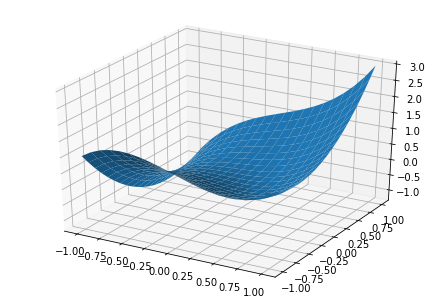

In [21]:
fig = pylab.figure()
ax = Axes3D(fig)

ax.plot_surface(x,y,z)
pylab.show()

In [22]:
np.einsum?

In [66]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import re
holder = []
with open("F0001/F0001_SU04WH_RAW.wrl", "r") as vrml:
    for line in vrml:
        a = line.strip().split(' ')
        a[-1] = a[-1][:-2] # remove comma
        if len(a) == 3:
            try:
                holder.append(list(map(float, a)))
            except:
                pass

holder_array = np.array(holder) #if you want numpy array

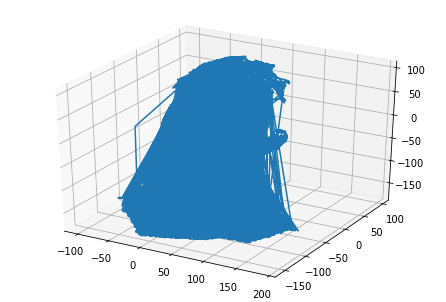

In [67]:
#2D Plotting
x,y,z = zip(*holder_array)
fig = plt.figure()
ax = Axes3D(fig)
ax.plot(x,y,z)
plt.show()

In [68]:
holder_array.shape

(17389, 3)

In [69]:
holder

[[21.8473, -88.0284, 46.298],
 [21.6032, -87.0257, 48.187],
 [19.5664, -87.5582, 47.12],
 [19.6042, -88.2502, 44.956],
 [21.666, -88.5553, 43.991],
 [23.6176, -87.919, 44.967],
 [23.6105, -87.205, 47.11],
 [23.2283, -85.9611, 48.871],
 [21.4415, -85.7294, 49.931],
 [19.4942, -86.4051, 48.986],
 [23.4245, -88.2379, 42.678],
 [25.1146, -87.2227, 43.47],
 [25.2905, -86.854, 45.715],
 [26.5627, -85.8614, 44.117],
 [26.7489, -85.3989, 46.215],
 [25.1786, -85.9377, 47.47],
 [24.7116, -87.3249, 41.168],
 [25.8778, -85.5049, 41.543],
 [26.6499, -84.6051, 48.028],
 [24.9888, -84.7948, 49.149],
 [27.7581, -84.4739, 42.676],
 [28.119, -84.3286, 44.902],
 [29.336, -83.0907, 43.464],
 [29.3209, -82.6331, 45.0],
 [28.0482, -83.8172, 46.975],
 [30.4085, -81.2995, 44.147],
 [30.1153, -80.6282, 46.151],
 [29.0521, -81.9504, 47.603],
 [31.0685, -79.2304, 44.613],
 [30.6133, -78.3957, 46.567],
 [29.5981, -79.6996, 48.011],
 [30.367, -81.7664, 41.854],
 [31.295, -79.9174, 42.495],
 [29.843, -77.4879, 48.3

In [70]:
ipv.quickscatter(holder_array[:, 0], holder_array[:, 1], holder_array[:, 2], size=1, marker="sphere")
ipv.show()

In [53]:
x = list(range(45, 55, 1))
z = list(range(-45, 10, 1))
y = list(range(-150, -100, 1)) 

In [64]:
#coords = [[x_, y_, z_] for x_ in x for y_ in y for z_ in z]
holder.extend(coords)
holder_array = np.array(holder)

[(45, -150, -45),
 (46, -149, -44),
 (47, -148, -43),
 (48, -147, -42),
 (49, -146, -41),
 (50, -145, -40),
 (51, -144, -39),
 (52, -143, -38),
 (53, -142, -37),
 (54, -141, -36)]

# New heading